CASE -

Consider there is a wine manufacturing company & this company wants to create a new brand of wine, they want you to find the quality of wine using several chemical parameters of wine.

WORK FLOW -

Wine data

Data Analysis

Data PreProcessing

Train Test Split

Random Forest Model

Model Evaluation

Prediction 

Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [5]:
data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Wine Quality Prediction Using Random Forest Classifier\winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Checking shape of dataframe

data.shape

(1599, 12)

In [7]:
# Checking missing values

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Statistical measure of data

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Data Visualization

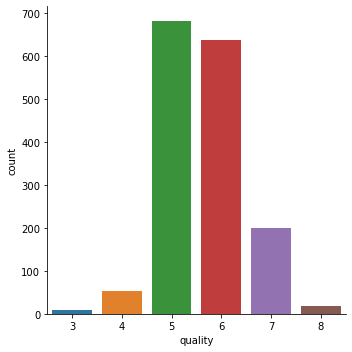

In [10]:
# Number of values for each quality

sns.catplot(x = 'quality', data = data, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

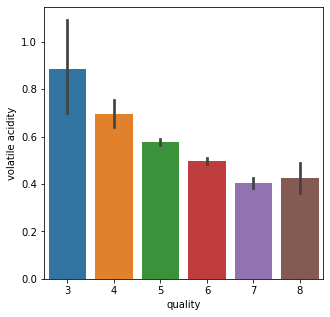

In [11]:
# Volatile acidity vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

Inference from above graph - 
Volatile acidity & quality are inversely proportional, means high the value of volatile acidity low will be the quality of wine

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

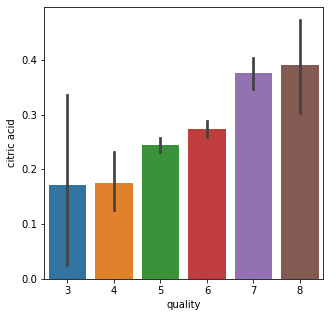

In [12]:
# Citric acid vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

Inference from above graph - 
Citric acid is directly proportional to quality means If the citric acid content is more then we are getting high quality wine.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

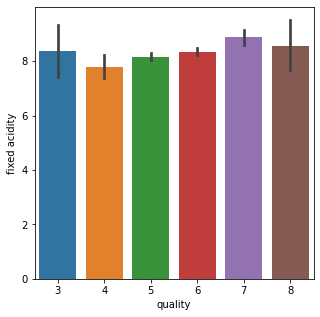

In [13]:
# Fixed acidity vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

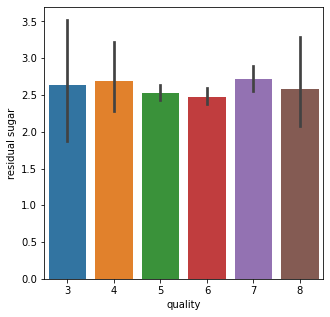

In [14]:
# Residual sugar vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

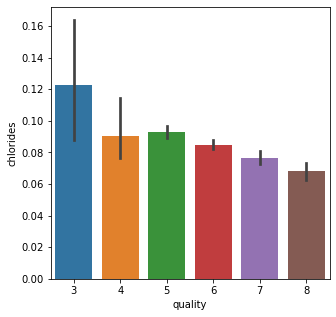

In [15]:
# chlorides vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

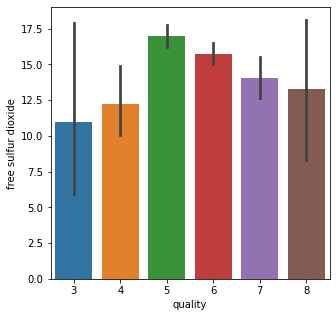

In [16]:
# free sulfur dioxide vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

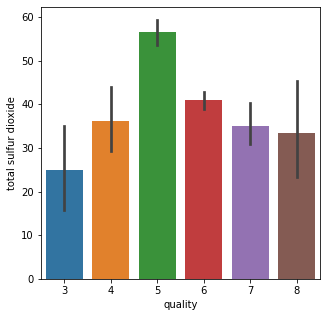

In [17]:
# total sulfur dioxide vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

<AxesSubplot:xlabel='quality', ylabel='density'>

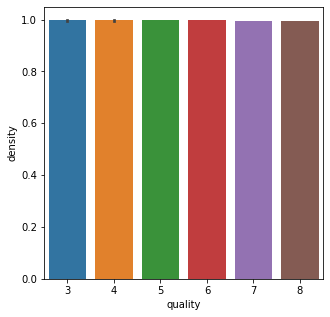

In [18]:
# density vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'density', data = data)

<AxesSubplot:xlabel='quality', ylabel='pH'>

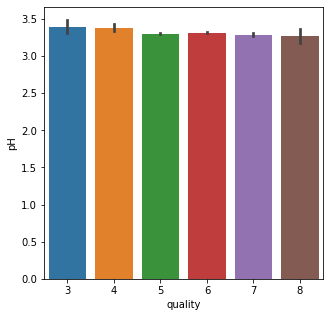

In [19]:
# pH vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'pH', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

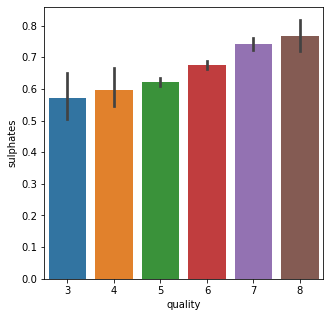

In [21]:
# sulphates vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

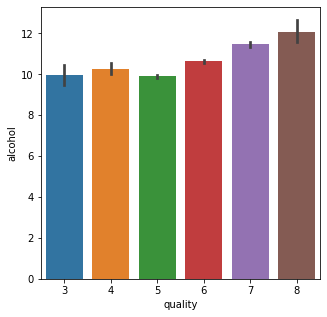

In [23]:
# alcohol vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

Correlation between all the features with quality

In [24]:
corr = data.corr()

<AxesSubplot:>

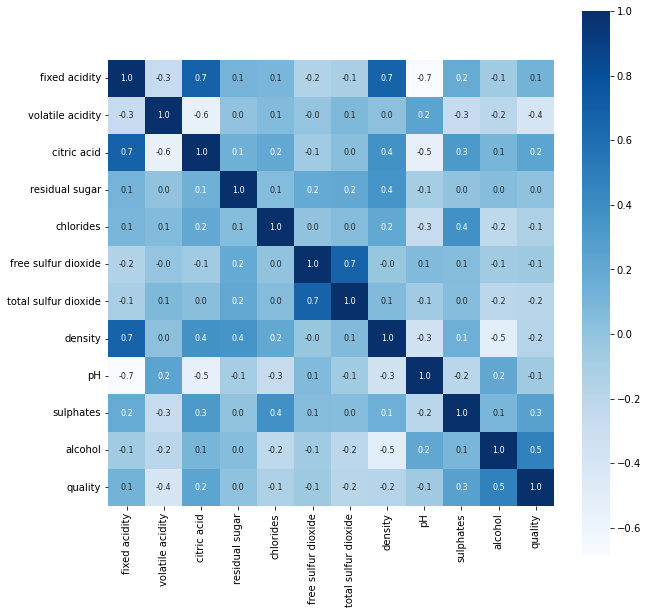

In [25]:
# Creating a heatmap to understand the correlation

plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

Data PreProcessing

In [26]:
# Separating data & label

x = data.drop('quality', axis = 1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Encoding

In [27]:
y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [28]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Splitting data into Train & Test

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [32]:
print(x.shape, x_train.shape, x_test.shape)

(1599, 11) (1279, 11) (320, 11)


Model Training

Random Forest Classifier - 

It is an ensemble model of multiple decision trees, means it uses more than 2 models in combination for prediction (trees). Each decision tree will give us result & It will take the majority value (mode) of output of decision trees as final result.

In [33]:
model = RandomForestClassifier()

In [34]:
model.fit(x_train, y_train)

RandomForestClassifier()

Model Evaluation

In [36]:
# Accuracy score on test data

x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy Score of Test Data :', test_data_accuracy)

Accuracy Score of Test Data : 0.925


CONCLUSION -

Accuracy score of our model is very good. Our model should be used for prediction.

Making a Predictive System

In [39]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# Changing input data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array as we are predicting the label for one sample

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine


C:\Users\SHREE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
